In [1]:
import pandas as pd
import numpy as np

In [2]:
!ls

Untitled.ipynb	Xte.csv  Xte_mat100.csv  Xtr.csv  Xtr_mat100.csv  Ytr.csv


In [43]:
X_train = pd.read_csv('Xtr.csv')
y_train = pd.read_csv('Ytr.csv')
X_test = pd.read_csv('Xte.csv')
X_train_mat = pd.read_csv('Xtr_mat100.csv', header=None, sep=' ')
X_train.shape, y_train.shape, X_test.shape

((2000, 2), (2000, 2), (1000, 2))

In [44]:
X_train.head()

,Id,seq
0,0,GAGGGGCTGGGGAGGGGGCTGGCCCAGAGGCACCAGACTCTGCAGA...
1,1,CGGCCTGGGGGCCACATGTGAGTGCTTACCTGTGTGGGGATGAGGG...
2,2,GACAACGCCGCTGTCAGCCGCCTTCGACTCACCTGGGAGGTGATGA...
3,3,GCCTCCCTTGGCACCACGGGAGACCAGTTTTGGAGGGGCGGGGCTG...
4,4,GCACTACTACACCCATTGCTGTAATAGTAAGTGCCGGTGCCTTCAC...


In [5]:
y_train.head()

,Id,Bound
0,0,1
1,1,0
2,2,1
3,3,0
4,4,1


In [6]:
X_test.head()

,Id,seq
0,0,TTTCTGCCAATTCAGCGTGTCTCTAGAGGGTAGTCCACTTCTGAGC...
1,1,CTTCTGGAGTGAGCTAAGCAGTTGGAGCCGTGGGTCTTCATGGCAC...
2,2,TCACCCATGCTGGAGTGCAGTGGCATGATCTCGGCTCACTGCAAGC...
3,3,GTCCCAGCTACGCGGCAGGCTGAGGCAGGAGAAAGGAGTGAACCCA...
4,4,TCGCTCCCTGGGCTCCTGTGCGGCTCAAGCCTCCCGGACGAGCGCC...


In [39]:
X_train_mat.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.010870,0.010870,0.010870,0.032609,0.010870,0.032609,0.010870,0.00000,0.000000,0.010870,...,0.021739,0.00000,0.00000,0.000000,0.010870,0.000000,0.00000,0.021739,0.00000,0.000000
1,0.000000,0.010870,0.021739,0.000000,0.021739,0.021739,0.000000,0.01087,0.021739,0.010870,...,0.032609,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.054348,0.00000,0.010870
2,0.021739,0.000000,0.000000,0.000000,0.043478,0.010870,0.010870,0.01087,0.000000,0.021739,...,0.000000,0.01087,0.01087,0.000000,0.000000,0.010870,0.00000,0.021739,0.00000,0.010870
3,0.000000,0.021739,0.032609,0.000000,0.021739,0.000000,0.032609,0.01087,0.021739,0.000000,...,0.010870,0.01087,0.00000,0.000000,0.000000,0.000000,0.00000,0.010870,0.01087,0.021739
4,0.010870,0.043478,0.000000,0.032609,0.010870,0.010870,0.000000,0.01087,0.010870,0.000000,...,0.000000,0.00000,0.01087,0.032609,0.021739,0.032609,0.01087,0.010870,0.00000,0.000000


In [45]:
X_train_mat.shape

(2000, 100)

In [46]:
y_train.shape

(2000, 2)

In [54]:
y_train.head()

,Id,Bound
0,0,1
1,1,0
2,2,1
3,3,0
4,4,1


In [116]:
y_train = y_train *2 - 1
y_train.head()

,Bound
0,1
1,-1
2,1
3,-1
4,1


In [55]:
y_train.drop('Id', inplace=True, axis=1)
y_train.shape

(2000, 1)

In [80]:
# Ridge Regression (RR)
def solveRR(y, X, lam):
    n, p = X.shape
    assert (len(y) == n)
    
    A = X.T.dot(X) 
    # Adjust diagonal due to Ridge
    A[np.diag_indices_from(A)] += lam * n
    b = X.T.dot(y)
    
    # Hint:
    beta = np.linalg.solve(A, b)
    # Finds solution to the linear system Ax = b
    return (beta)

In [81]:
# Weighted Ridge Regression (WRR)
def solveWRR(y, X, w, lam):
    n, p = X.shape
    assert (len(y) == len(w) == n)
    
    y1 = np.sqrt(w) * y
    X1 = (np.sqrt(w) * X.T).T
    # Hint:
    # Find y1 and X1 such that:
    beta = solveRR(y1, X1, lam)
    return (beta)

In [ ]:
# lam = 0.1
# w = np.random.rand(len(y))

# # Our solver
# beta1 = solveWRR(y, X, w, lam)

# # Python solver
# alpha = lam * X.shape[0]
# model = lm.Ridge(alpha=alpha, fit_intercept=False, normalize=False)
# beta2 = model.fit(X, y, sample_weight=w).coef_

# # Check
# compare(beta1, beta2)

In [345]:
def solveLRR(y, X, lam):
    n, p = X.shape
    assert (len(y) == n)
    
    # Parameters
    max_iter = 1200
    eps = 3e-4
    sigmoid = lambda a: 1/(1 + np.exp(-a))
    
    # Initialize
    beta = np.ones(p)
            
    # Hint: Use IRLS
    for i in range(max_iter):
        beta_old = beta
        f = X.dot(beta_old)
        w = sigmoid(f) * sigmoid(-f)
        z = f + y / sigmoid(y*f)
        beta = solveWRR(z, X, w, 2*lam)
        # Break condition (achieved convergence)
        #if np.sum((beta-beta_old)**2) < eps:
        #    break
    return (beta)

In [362]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

# Scaling is important
X_train = scale(X_train_mat)
# X = (X - X.mean()) / X.std()
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_mat, y_train, test_size=0.2, random_state=62)
X_train1.shape

(1600, 100)

In [356]:
X_test1.shape, y_train1.shape, y_test1.shape

((400, 100), (1600, 1), (400, 1))

In [330]:
type(y_bin), type(X_train1)

(numpy.ndarray, numpy.ndarray)

In [351]:
X_train1

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
683,0.010870,0.032609,0.010870,0.000000,0.000000,0.021739,0.021739,0.010870,0.032609,0.000000,...,0.010870,0.043478,0.000000,0.043478,0.01087,0.000000,0.010870,0.021739,0.010870,0.000000
925,0.000000,0.010870,0.054348,0.000000,0.000000,0.010870,0.000000,0.010870,0.032609,0.000000,...,0.010870,0.010870,0.010870,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.054348
1988,0.021739,0.010870,0.010870,0.021739,0.000000,0.010870,0.021739,0.032609,0.010870,0.000000,...,0.000000,0.010870,0.010870,0.000000,0.00000,0.010870,0.000000,0.010870,0.010870,0.010870
1728,0.000000,0.000000,0.000000,0.010870,0.021739,0.010870,0.010870,0.021739,0.000000,0.000000,...,0.010870,0.000000,0.010870,0.010870,0.01087,0.000000,0.000000,0.010870,0.000000,0.021739
750,0.000000,0.000000,0.000000,0.021739,0.021739,0.010870,0.010870,0.021739,0.021739,0.021739,...,0.021739,0.010870,0.021739,0.000000,0.00000,0.000000,0.010870,0.010870,0.000000,0.010870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.000000,0.021739,0.043478,0.000000,0.000000,0.000000,0.021739,0.010870,0.010870,0.000000,...,0.000000,0.010870,0.000000,0.032609,0.01087,0.000000,0.010870,0.000000,0.032609,0.010870
1929,0.032609,0.010870,0.000000,0.010870,0.021739,0.021739,0.010870,0.021739,0.010870,0.021739,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.021739,0.021739,0.010870,0.000000,0.000000
1617,0.000000,0.021739,0.010870,0.000000,0.000000,0.000000,0.010870,0.010870,0.000000,0.000000,...,0.010870,0.000000,0.010870,0.021739,0.01087,0.032609,0.021739,0.000000,0.054348,0.021739
1048,0.065217,0.000000,0.000000,0.021739,0.000000,0.032609,0.000000,0.032609,0.010870,0.021739,...,0.032609,0.000000,0.000000,0.000000,0.01087,0.000000,0.000000,0.000000,0.000000,0.000000


In [358]:
y_train1.head()

,Bound
683,-1
925,1
1988,1
1728,-1
750,1


In [74]:
from sklearn import linear_model as lm

In [84]:
def compare(beta1, beta2):
    print('''
Our solver:
{}
Scikit-learn:
{}

Difference between the two:
{}
        '''.format(beta1, beta2, np.sum((beta1-beta2)**2))
    )

In [364]:
X_train1.shape

(1600, 100)

In [365]:
y_train1.shape

(1600, 1)

In [367]:
y_train1 = np.array(y_train1)
X_train1 = np.array(X_train1)
#y_bin = np.sign(y_train1) # Binarize targets
lam = 0.34567
y_bin = y_train1.ravel()

# Our solver
beta1 = solveLRR(y_bin, X_train1, lam)

# Python solver
alpha = 2 * lam * X_train1.shape[0]
model = lm.LogisticRegression(C=1/alpha, fit_intercept=False)
beta2 = model.fit(X_train1, y_bin).coef_

# Check
compare(beta1, beta2)


Our solver:
[-1.32522571e-04  5.06208451e-04 -3.92794788e-04  5.01256642e-04
 -2.40486545e-04  1.98353671e-05  2.80233291e-04  5.25836824e-04
 -3.68215452e-04 -2.30800455e-04  2.40878638e-04  3.24452264e-04
  9.34137612e-05 -1.96409106e-04  9.43447267e-04 -4.61662680e-04
  3.39142141e-04 -7.34829459e-05 -5.39281566e-05  9.98923151e-06
 -2.11179072e-04  2.21255919e-04  4.81544936e-04  2.97224128e-05
  1.86824526e-04  7.02660517e-04  5.35662031e-04 -2.79829963e-04
 -5.69673240e-04  2.46317928e-05  3.19435167e-04  3.83401715e-04
  1.32804443e-04  5.70017677e-04  1.99008651e-05 -2.50308486e-04
 -5.89303240e-04 -4.07645028e-04 -1.02951060e-04  1.48952992e-05
 -6.36370409e-05 -1.71807632e-04 -3.58369382e-04  3.63699364e-04
 -4.37133472e-04  4.52125413e-04 -9.92144246e-04  1.42669746e-04
  4.93079806e-05  2.47838828e-05  5.00615176e-06 -7.84178069e-05
 -4.51786704e-04  8.85560026e-05  5.13312871e-06  4.44980232e-05
  1.13185135e-04 -2.79930533e-04 -1.66777874e-04  1.57432266e-04
 -5.64794282

/usr/lib/python3/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [340]:
beta1.shape, beta2.shape

((100,), (1, 100))

In [368]:
# Compute predicted probabilities and classes
probas_pred = 1 / (1+np.exp(-beta1.T.dot(X_test1.T)))
y_pred = np.sign(probas_pred-.5)

In [369]:
from sklearn.metrics import accuracy_score, roc_auc_score

print("Our model's performance:")
#print('Accuracy: {:.2%}'.format(accuracy_score(y_train1, y_pred)))
print('Accuracy: {:.2%}'.format(accuracy_score(y_test1, y_pred)))
print('AUC: {:.2%}'.format(roc_auc_score(y_test1, probas_pred)))

Our model's performance:
Accuracy: 54.00%
AUC: 59.42%


In [349]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

          -1       0.58      0.58      0.58       197
           1       0.59      0.59      0.59       203

   micro avg       0.58      0.58      0.58       400
   macro avg       0.58      0.58      0.58       400
weighted avg       0.58      0.58      0.58       400



In [273]:
X_test_mat = pd.read_csv('Xte_mat100.csv', header=None, sep=' ')
X_test_mat.shape

(1000, 100)

In [274]:
# Compute predicted probabilities and classes
probas_pred = 1 / (1+np.exp(-beta1.T.dot(X_test_mat.T)))
y_pred = np.sign(probas_pred-.5)

In [275]:
y_pred.shape

(1000,)

In [276]:
X_test_mat['pred'] = y_pred
X_test_mat.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,pred
0,0.000000,0.00000,0.000000,0.021739,0.010870,0.000000,0.043478,0.021739,0.000000,0.000000,...,0.000000,0.000000,0.0,0.010870,0.000000,0.010870,0.01087,0.00000,0.000000,1.0
1,0.000000,0.00000,0.010870,0.010870,0.010870,0.000000,0.021739,0.010870,0.010870,0.010870,...,0.010870,0.043478,0.0,0.000000,0.000000,0.000000,0.01087,0.00000,0.032609,-1.0
2,0.021739,0.01087,0.010870,0.010870,0.021739,0.021739,0.021739,0.000000,0.010870,0.043478,...,0.000000,0.000000,0.0,0.021739,0.000000,0.021739,0.01087,0.00000,0.000000,-1.0
3,0.010870,0.01087,0.021739,0.000000,0.000000,0.010870,0.021739,0.010870,0.032609,0.000000,...,0.021739,0.010870,0.0,0.010870,0.010870,0.000000,0.00000,0.01087,0.032609,-1.0
4,0.021739,0.01087,0.010870,0.010870,0.010870,0.010870,0.000000,0.010870,0.000000,0.043478,...,0.000000,0.000000,0.0,0.000000,0.021739,0.000000,0.01087,0.00000,0.000000,-1.0


In [280]:
X_test_mat['pred'] = (X_test_mat['pred'] + 1)/2

In [284]:
X_test_mat['pred'] = X_test_mat['pred'].astype('int')

In [285]:
X_test_mat.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,pred
0,0.000000,0.00000,0.000000,0.021739,0.010870,0.000000,0.043478,0.021739,0.000000,0.000000,...,0.000000,0.000000,0.0,0.010870,0.000000,0.010870,0.01087,0.00000,0.000000,1
1,0.000000,0.00000,0.010870,0.010870,0.010870,0.000000,0.021739,0.010870,0.010870,0.010870,...,0.010870,0.043478,0.0,0.000000,0.000000,0.000000,0.01087,0.00000,0.032609,0
2,0.021739,0.01087,0.010870,0.010870,0.021739,0.021739,0.021739,0.000000,0.010870,0.043478,...,0.000000,0.000000,0.0,0.021739,0.000000,0.021739,0.01087,0.00000,0.000000,0
3,0.010870,0.01087,0.021739,0.000000,0.000000,0.010870,0.021739,0.010870,0.032609,0.000000,...,0.021739,0.010870,0.0,0.010870,0.010870,0.000000,0.00000,0.01087,0.032609,0
4,0.021739,0.01087,0.010870,0.010870,0.010870,0.010870,0.000000,0.010870,0.000000,0.043478,...,0.000000,0.000000,0.0,0.000000,0.021739,0.000000,0.01087,0.00000,0.000000,0


In [286]:
X_test_mat['pred'].to_csv('sub.csv')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [161]:
def woe_continuous(df, variable, target_variable, discrete):
    """
    params:
    df: A dataframe containing both discrete variables and continuous variables.
    variable: Variable to get WoE as a string, ie. 'employment'.
    target_variable: Discrete dependent variable split from main dataset. 
    discrete: A switch for turning on and off the variable type.
    
    return:
    data: A dataframe with WoE and IV (Information Value) calculated.
    
    Example:
    woe_IV = woe_discrete(df=dataframe, variable='discrete_variable_name_in_dataframe', 
    target_variable=dependent_variable_array_or_dataframe)
    """
    data = pd.concat([df[variable], target_variable], axis=1)
    data = pd.concat([data.groupby(data.columns.values[0], as_index=False)[data.columns.values[1]].count(),
                      data.groupby(data.columns.values[0], as_index=False)[data.columns.values[1]].mean()], axis=1)
    data = data.iloc[:,[0,1,3]]
    data.columns = [data.columns.values[0], 'n_obs', 'prop_good']
    data['prop_n_obs'] = data['n_obs'] / data['n_obs'].sum()
    data['n_good'] = data['prop_good'] * data['n_obs']
    data['n_bad'] = (1-data['prop_good']) * data['n_obs']
    data['prop_n_good'] = data['n_good'] / data['n_good'].sum()
    data['prop_n_bad'] = data['n_bad'] / data['n_bad'].sum()
    data['WoE'] = np.log(data['prop_n_good'] / data['prop_n_bad'])
    if discrete:
        data = data.sort_values(['WoE'])
        data = data.reset_index(drop=True)
    data['diff_prop_good'] = data['prop_good'].diff().abs()
    data['diff_WoE'] = data['WoE'].diff().abs()
    data['IV'] = (data['prop_n_good'] - data['prop_n_bad']) * data['WoE']
    data['IV'] = data['IV'].sum()
    return data    

In [162]:
X_train_mat.columns.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [265]:
woe_continuous(X_train_mat, 99, y_train, False)

/home/michael/.local/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,99,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.000000,1016,-0.007874,0.5080,-8.0,1024.0,2.00,0.510978,1.364576,NaN,NaN,10.068844
1,0.010870,640,-0.015625,0.3200,-10.0,650.0,2.50,0.324351,2.042219,0.007751,0.677643,10.068844
2,0.021739,257,0.003891,0.1285,1.0,256.0,-0.25,0.127745,NaN,0.019516,NaN,10.068844
3,0.032609,64,0.218750,0.0320,14.0,50.0,-3.50,0.024950,NaN,0.214859,NaN,10.068844
4,0.043478,13,0.076923,0.0065,1.0,12.0,-0.25,0.005988,NaN,0.141827,NaN,10.068844
5,0.054348,9,-0.333333,0.0045,-3.0,12.0,0.75,0.005988,4.830312,0.410256,NaN,10.068844
6,0.065217,1,1.000000,0.0005,1.0,0.0,-0.25,0.000000,NaN,1.333333,NaN,10.068844


#### np.unique(y_pred)

In [288]:
# Select features
X_train_new = X_train_mat[[7, 9,13, 15, 16,17, 19, 21, 27, 31, 35, 40, 44, 48, 50, 51, 56, 57, 61, 63, 66, 
                           67, 72, 77, 78, 80, 87, 91, 94, 99]]
X_train_new.head()

,7,9,13,15,16,17,19,21,27,31,...,66,67,72,77,78,80,87,91,94,99
0,0.00000,0.010870,0.010870,0.010870,0.010870,0.010870,0.032609,0.00000,0.021739,0.043478,...,0.010870,0.010870,0.000000,0.021739,0.01087,0.00000,0.010870,0.00000,0.010870,0.000000
1,0.01087,0.010870,0.000000,0.010870,0.010870,0.010870,0.010870,0.01087,0.000000,0.000000,...,0.032609,0.021739,0.000000,0.000000,0.01087,0.01087,0.021739,0.00000,0.000000,0.010870
2,0.01087,0.021739,0.032609,0.000000,0.021739,0.000000,0.010870,0.00000,0.010870,0.000000,...,0.021739,0.021739,0.000000,0.010870,0.00000,0.00000,0.000000,0.01087,0.000000,0.010870
3,0.01087,0.000000,0.000000,0.010870,0.000000,0.032609,0.010870,0.00000,0.010870,0.010870,...,0.010870,0.032609,0.010870,0.000000,0.01087,0.00000,0.000000,0.01087,0.000000,0.021739
4,0.01087,0.000000,0.000000,0.032609,0.000000,0.000000,0.010870,0.00000,0.000000,0.043478,...,0.010870,0.021739,0.021739,0.021739,0.00000,0.01087,0.000000,0.00000,0.021739,0.000000


In [289]:
# Scaling is important
X_train = scale(X_train_new)
# X = (X - X.mean()) / X.std()
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
X_train1.shape

(1400, 30)

In [290]:
X_test1.shape, y_train1.shape, y_test1.shape

((600, 30), (1400, 1), (600, 1))

In [322]:
y_bin = np.sign(y_train1) # Binarize targets
lam = 0.1
y_bin = y_bin.values.ravel()

# Our solver
beta1 = solveLRR(y_bin, X_train1, lam)

# Python solver
alpha = 2 * lam * X_train1.shape[0]
model = lm.LogisticRegression(C=10/alpha, fit_intercept=False)
beta2 = model.fit(X_train1, y_bin).coef_

# Check
compare(beta1, beta2)


Our solver:
[ 8.51765744e-02 -2.33781505e-02 -5.95990931e-02 -3.66870805e-02
  4.85862178e-02 -2.34913110e-02  1.94850973e-02  5.07703258e-02
 -2.34122076e-02  8.18675799e-02 -2.51311718e-02 -1.79707036e-02
 -6.54441156e-02  2.10664459e-02  9.13110100e-03 -9.22795374e-03
  3.12734177e-02 -5.49703066e-02  2.76049963e-03 -8.61964415e-02
 -4.82180716e-02 -5.33772214e-02 -5.91721298e-02 -7.61921621e-05
 -2.15250925e-02 -4.26745950e-03 -5.06935611e-02  5.86124848e-02
  2.24191307e-02  5.71648810e-03]
Scikit-learn:
[[ 0.14655    -0.01989431 -0.08906003 -0.05973218  0.08752245 -0.04706317
   0.04038456  0.09607378 -0.04640553  0.1638786  -0.02822952 -0.04135184
  -0.11039973  0.02721115  0.01033549 -0.00453589  0.05869038 -0.08588612
  -0.00025765 -0.16304372 -0.07429018 -0.0987031  -0.12110544 -0.01082713
  -0.02031491 -0.00534388 -0.1317551   0.1040217   0.03332453  0.00567054]]

Difference between the two:
0.042693842519255676
        


/usr/lib/python3/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [325]:
# Compute predicted probabilities and classes
probas_pred = 1 / (1+np.exp(-beta1.T.dot(X_test1.T)))
y_pred = np.sign(probas_pred-.5)

In [326]:
print("Our model's performance:")
#print('Accuracy: {:.2%}'.format(accuracy_score(y_train1, y_pred)))
print('Accuracy: {:.2%}'.format(accuracy_score(y_test1, y_pred)))
print('AUC: {:.2%}'.format(roc_auc_score(y_test1, probas_pred)))

Our model's performance:
Accuracy: 53.83%
AUC: 56.77%


In [294]:
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

          -1       0.52      0.56      0.54       288
           1       0.56      0.52      0.54       312

   micro avg       0.54      0.54      0.54       600
   macro avg       0.54      0.54      0.54       600
weighted avg       0.54      0.54      0.54       600



In [375]:
X_train_mat.shape

(2000, 100)

In [376]:
y_train.shape

(2000, 1)

In [378]:
full = pd.concat([X_train_mat, y_train], axis = 1)
full.shape

(2000, 101)

In [380]:
full.to_csv('concat_mat.csv', header=False)

In [370]:
# Logistic Regression on Diabetes Dataset
from random import seed
from random import randrange
from csv import reader
from math import exp

In [373]:

# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

        
# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
            

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores
 
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return 1.0 / (1.0 + exp(-yhat))
 
# Estimate logistic regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            yhat = predict(row, coef)
            error = row[-1] - yhat
            coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
    return coef
 
# Linear Regression Algorithm With Stochastic Gradient Descent
def logistic_regression(train, test, l_rate, n_epoch):
    predictions = list()
    coef = coefficients_sgd(train, l_rate, n_epoch)
    for row in test:
        yhat = predict(row, coef)
        yhat = round(yhat)
        predictions.append(yhat)
    return(predictions)

In [383]:
# Test the logistic regression algorithm on the diabetes dataset
seed(1)
# load and prepare data
#filename = '/home/michael/Documents/Programming#/AMMI Basics/pima-indians-diabetes.data'
filename = 'concat_mat.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
# normalize
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
# evaluate algorithm
n_folds = 5
l_rate = 0.003
n_epoch = 100
scores = evaluate_algorithm(dataset, logistic_regression, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [60.5, 62.5, 57.25, 59.5, 57.25]
Mean Accuracy: 59.400%


In [1]:
import pandas as pd
import numpy as np

In [52]:
X_train = pd.read_csv('Xtr.csv')
y_train = pd.read_csv('Ytr.csv')
X_test = pd.read_csv('Xte.csv')
X_train_mat = pd.read_csv('Xtr_mat100.csv', header=None, sep=' ')
X_train.shape, y_train.shape, X_test.shape

((2000, 2), (2000, 2), (1000, 2))

In [53]:
X_train_mat.shape

(2000, 100)

In [54]:
X_train_mat.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.010870,0.010870,0.010870,0.032609,0.010870,0.032609,0.010870,0.00000,0.000000,0.010870,...,0.021739,0.00000,0.00000,0.000000,0.010870,0.000000,0.00000,0.021739,0.00000,0.000000
1,0.000000,0.010870,0.021739,0.000000,0.021739,0.021739,0.000000,0.01087,0.021739,0.010870,...,0.032609,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.054348,0.00000,0.010870
2,0.021739,0.000000,0.000000,0.000000,0.043478,0.010870,0.010870,0.01087,0.000000,0.021739,...,0.000000,0.01087,0.01087,0.000000,0.000000,0.010870,0.00000,0.021739,0.00000,0.010870
3,0.000000,0.021739,0.032609,0.000000,0.021739,0.000000,0.032609,0.01087,0.021739,0.000000,...,0.010870,0.01087,0.00000,0.000000,0.000000,0.000000,0.00000,0.010870,0.01087,0.021739
4,0.010870,0.043478,0.000000,0.032609,0.010870,0.010870,0.000000,0.01087,0.010870,0.000000,...,0.000000,0.00000,0.01087,0.032609,0.021739,0.032609,0.01087,0.010870,0.00000,0.000000


In [55]:
y_train.head()

,Id,Bound
0,0,1
1,1,0
2,2,1
3,3,0
4,4,1


In [56]:
# drop id column
y_train.drop('Id', axis=1, inplace=True)

In [57]:
y_train = (y_train *2) - 1

In [58]:
X_train_mat.shape, y_train.shape

((2000, 100), (2000, 1))

In [59]:
from sklearn.model_selection import train_test_split

x_tr, xte, y_tr, y_te = train_test_split(X_train_mat, y_train, test_size = 0.3, random_state=42)

In [60]:
x_tr.shape, xte.shape, y_tr.shape, y_te.shape

((1400, 100), (600, 100), (1400, 1), (600, 1))

In [4]:
import sys
import sklearn
print(sys.version, sklearn.__version__)

3.7.3 (default, Dec 20 2019, 18:57:59) 
[GCC 8.3.0] 0.20.2


In [5]:
sys.prefix

'/usr'

In [6]:
sys.executable

'/usr/bin/python3'

In [10]:
solver = 'cvxopt'
# solver = 'quadprog'

if solver == 'cvxopt':
    try:
        import cvxopt
    except:
        try:
            !pip3 install cvxopt
            import cvxopt
        except:
            raise ImportError('Could not import or pip install cvxopt. Try installing from terminal or use solver = quadprog')
            
if solver == 'quadprog':
    try:
        import quadprog
    except:
        try:
            !pip3 install quadprog
            import quadprog
        except:
            raise ImportError('Could not import or install quadprog. Try installing from terminal or change solver = cvxopt')
            
print('Using solver `{}`'.format(solver))

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.6 MB 765 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Using solver `cvxopt`


In [61]:
y_tr = y_tr.values.ravel()
y_te = y_te.values.ravel()

In [11]:
# Testing using Scikit-learn SVM
from sklearn.svm import LinearSVC

In [62]:
# Set parameters
C = 10

# Create the model
clf = LinearSVC(penalty='l2', loss='hinge', C=C, max_iter=20000)
# train the model
clf.fit(x_tr, y_tr)
clf.__dict__

{'dual': True,
 'tol': 0.0001,
 'C': 10,
 'multi_class': 'ovr',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'verbose': 0,
 'random_state': None,
 'max_iter': 20000,
 'penalty': 'l2',
 'loss': 'hinge',
 'classes_': array([-1,  1]),
 'coef_': array([[ -3.770933  ,   6.63118979,  -4.09632206,   4.27004653,
          -0.67794592,  -0.93777775,   4.43584308,   5.59330135,
           1.21877504,  -2.4306309 ,   4.91534827,   2.82647694,
           1.33875857,  -5.53214283,  10.72607343,  -2.56213827,
           2.91584822,  -2.02240224,   1.47645335,   2.01115126,
          -5.42287075,   4.56163871,   0.90844747,   2.20189118,
           4.86974958,   6.6205995 ,   7.01112137,  -0.80567588,
          -4.87229893,  -1.0496087 ,   1.51937588,   4.39400892,
           1.88433117,   4.45873995,   0.18726611,   0.76924921,
          -7.87675471,  -4.90278497,  -1.19070044,  -0.13047377,
          -0.10867829,  -1.82760848,  -2.81580597,   3.17550044,
          -7.459

In [24]:
# Get prediction error
def error(y_pred, y_true):
    e = (y_pred != y_true).mean()
    return e

In [63]:
w = clf.coef_[0]
b = clf.intercept_[0]
print('Model parameters:')
print('w: {}'.format(w))
print('b: {}'.format(b))

Model parameters:
w: [ -3.770933     6.63118979  -4.09632206   4.27004653  -0.67794592
  -0.93777775   4.43584308   5.59330135   1.21877504  -2.4306309
   4.91534827   2.82647694   1.33875857  -5.53214283  10.72607343
  -2.56213827   2.91584822  -2.02240224   1.47645335   2.01115126
  -5.42287075   4.56163871   0.90844747   2.20189118   4.86974958
   6.6205995    7.01112137  -0.80567588  -4.87229893  -1.0496087
   1.51937588   4.39400892   1.88433117   4.45873995   0.18726611
   0.76924921  -7.87675471  -4.90278497  -1.19070044  -0.13047377
  -0.10867829  -1.82760848  -2.81580597   3.17550044  -7.45994454
   5.91144379  -3.69298717   2.84657724   1.79501214   2.50169675
   0.49655447  -1.20946282  -3.8853142   -0.12201548   1.59572443
   5.46017261   2.75801164  -6.0402045    2.81242521   3.19404732
  -3.81564897   1.48394897  -1.81712755  -6.25307663  -2.50220861
 -10.4965556   -2.93659725  -3.16918867  -2.82606712  -9.62809835
  -4.2669007   -2.64559387  -4.11537076  10.04187336  -4.

In [64]:
# Training error
y_fit = clf.predict(x_tr)
tr_error = error(y_fit, y_tr)
print('Training error = {:.1%}'.format(tr_error))

# Testing error
y_fit = clf.predict(xte)
tr_error = error(y_fit, y_te)
print('Training error = {:.1%}'.format(tr_error))

Training error = 35.9%
Training error = 41.7%


In [65]:
# What clf.predict does under the hood:
y_fit = np.sign(x_tr.dot(w) + b)
err_train = error(y_fit, y_tr)
print('Training error = {:.1%}'.format(err_train))

Training error = 35.9%


In [66]:
from sklearn.model_selection import cross_val_score

# Cross validation
CL = 10 ** np.linspace(-3, 2, 100)
cvsL = np.zeros(len(CL))

for i, C in enumerate(CL):
    clf = LinearSVC(penalty='l2',loss='hinge', C=C, max_iter=100000)
    scores = cross_val_score(clf, x_tr, y_tr, cv=5, scoring='accuracy')
    cvsL[i] = scores.mean()
    
best_index = np.argmax(cvsL)
best_C = CL[best_index]

# Training with cross-validated C
clf_best = LinearSVC(penalty='l2', loss='hinge', C=best_C, max_iter=100000)
clf_best.fit(x_tr, y_tr)

print('Results with optimal C')
print('----------------------')
# Training error
y_fit = clf_best.predict(x_tr)
err_train = error(y_fit, y_tr)
print('Training error = {:.1%}'.format(err_train))

# Testing error
y_pred = clf_best.predict(xte)
err_test = error(y_pred, y_te)
print('Testing error = {:.1%}'.format(err_test))

# plot_points_with_margin(X_train2, y_train2, clf_best.coef_[0], clf_best.intercept_[0])

Results with optimal C
----------------------
Training error = 33.8%
Testing error = 41.5%


In [67]:
clf_best.__dict__

{'dual': True,
 'tol': 0.0001,
 'C': 100.0,
 'multi_class': 'ovr',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'verbose': 0,
 'random_state': None,
 'max_iter': 100000,
 'penalty': 'l2',
 'loss': 'hinge',
 'classes_': array([-1,  1]),
 'coef_': array([[ -5.39517794,   8.99920442,  -6.47891427,   5.4918185 ,
           5.26790041,  -0.02337445,  10.6714804 ,  11.546677  ,
           7.50704196,  -3.9706308 ,  12.3972693 ,   8.04294266,
           1.78957895,  -7.08203349,  22.3145003 ,  -4.27146837,
          -0.7303063 ,  -8.25012272,   2.46516431,   1.72309256,
         -10.95966706,   6.99906492, -11.2458026 ,   6.54750387,
          13.06810807,  17.90301235,  11.75185693,  -6.78322431,
          -6.84870485,  -2.74296794,   4.38797386,   1.9976788 ,
           3.99837825,   9.07694545,   3.26501628,   5.03913627,
         -15.57971243,  -5.00958685,   5.03373834,   2.16631929,
          -1.60505795,  -2.24787256,  -9.97140203,   2.39249804,
         -13

In [69]:
x_tr.shape

(1400, 100)

In [71]:
import matplotlib.pyplot as plt

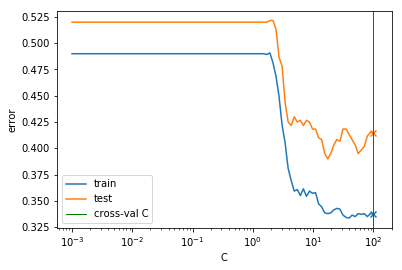

In [74]:
# Train-test error curve
err_train = np.zeros(len(CL))
err_test = np.zeros(len(CL))

# OPTIONAL
# We also store the model coefficients to plot the decision boundaries
b = np.zeros_like(CL)
w = np.zeros((len(CL), 100))

for i, C in enumerate(CL):
    # print('C = ', C)
    clf = LinearSVC(penalty='l2',loss='hinge',C=C, max_iter=100000)
    clf.fit(x_tr, y_tr)
    
    # Store model coefs
    b[i] = clf.intercept_[0]
    w[i] = clf.coef_[0]

    # Training error
    y_fit = clf.predict(x_tr)
    err_train[i] = error(y_fit, y_tr)
    # print('Training error = ', err_train[i])
    
    # Testing error
    y_pred = clf.predict(xte)
    err_test[i] = error(y_pred, y_te)
    # print('Testing error = ', err_test[i])

# Plot training and testing error as a function of C
plt.figure()
plt.plot(CL, err_train, label='train')
plt.xscale('log')
plt.plot(CL, err_test, label='test')
plt.axvline(best_C, linewidth=1, color='g', label='cross-val C')
plt.legend()
plt.scatter(best_C, err_train[best_index], marker='x', label='train')
plt.scatter(best_C, err_test[best_index], marker='x', label='test')
plt.xlabel('C')
plt.ylabel('error')
plt.show()

In [76]:
!pip install bqplot

Defaulting to user installation because normal site-packages is not writeable


In [79]:
try:
    import bqplot as bqp
except:
    try:
        # !conda install --yes --prefix {sys.prefix} -c conda-forge bqplot
        # If conda install fails for you, try pip install:
        !{sys.executable} -m pip install bqplot
        !jupyter nbextension enable [--system|--sys-prefix] bqplot
        # !jupyter nbextension enable --py --prefix {sys.prefix} bqplot
        import bqplot as bqp
    except:
        raise ImportError('Could not import or conda install bqplot. You could try installing with pip')
try:
    from ipywidgets import IntSlider, HTML, HBox, VBox
except:
    try:
        # !conda install --yes --prefix {sys.prefix} ipywidgets
        # If conda install fails for you, try pip install:
        !{sys.executable} -m pip install bqplot
        from ipywidgets import IntSlider, HTML, HBox, VBox
    except:
        raise ImportError('Could not import or conda install ipywidgets. You could try installing with pip')

x1 = np.linspace(xte[:,0].min(), xte[:,0].max(), 100)

slider_C = IntSlider(min=0, max=len(CL)-1, value=len(CL)/2,
                     description='Choose C:', readout=False)
readout = HTML()
fig = bqp.pyplot.figure(min_aspect_ratio=1.1, max_aspect_ratio=1.1,
           layout={'min_width': '500px', 'min_height': '500px'})
scat = bqp.pyplot.scatter(xte[::2, 0], xte[::2, 1],
                   colors=['orange' if y == 1 else 'purple' for y in y_te[::2]])
                   #axes_options={'color': None})
sep = bqp.pyplot.plot(x1, np.zeros_like(x1), preserve_domain={'x': True, 'y': True})
margin_up = bqp.pyplot.plot(x1, np.zeros_like(x1), '--', preserve_domain={'x': True, 'y': True})
margin_down = bqp.pyplot.plot(x1, np.zeros_like(x1), '--', preserve_domain={'x': True, 'y': True})


def update_margins(*args):
    i = slider_C.value
    sep.y, margin_up.y, margin_down.y = compute_margins(b[i], w[i, 0], w[i, 1], sep.x)
    readout.value = 'C = {:.3f}'.format(CL[i])

slider_C.observe(update_margins)
update_margins()

#bqp.show()
VBox([fig, HBox([slider_C, readout])])

Defaulting to user installation because normal site-packages is not writeable
/usr/bin/sh: 1: --sys-prefix]: not found
Enabling notebook extension [--system...
      - Validating: problems found:
        - require?  X [--system


ImportError: Could not import or conda install bqplot. You could try installing with pip

In [80]:
# You don't need to look at this, this is just to adapt our matrices
# to the solver being used

def quadprog_solve_qp(P, q, G=None, h=None, A=None, b=None):
    qp_G = .5 * (P + P.T)   # make sure P is symmetric
    qp_a = -q
    if A is not None:
        qp_C = -np.vstack([A, G]).T
        qp_b = -np.hstack([b, h])
        meq = A.shape[0]
    else:  # no equality constraint
        qp_C = - G.T
        qp_b = - h
        meq = 0
    return quadprog.solve_qp(qp_G, qp_a, qp_C, qp_b, meq)[0]

def cvxopt_qp(P, q, G, h, A, b):
    P = .5 * (P + P.T)
    cvx_matrices = [
        cvxopt.matrix(M) if M is not None else None for M in [P, q, G, h, A, b] 
    ]
    solution = cvxopt.solvers.qp(*cvx_matrices)
    return np.array(solution['x']).flatten()

solve_qp = {'quadprog': quadprog_solve_qp, 'cvxopt': cvxopt_qp}[solver]

In [81]:
def svm_primal_hard_to_qp(X, y):
    n, p = X.shape
    assert (len(y) == n)
    
    Xy = np.diag(y).dot(X)
    # Primal formulation, hard margin
    diag_P = np.ones(p + 1) # correct this!
    diag_P[-1] = 0 # The one multiplies with b
    # As a regularization, we add epsilon * identity to P
    eps = 1e-12
    diag_P += eps
    P = np.diag(diag_P)
    
    q = np.zeros(p + 1)
    G = np.hstack([Xy, y[:, np.newaxis]]) # newaxis transforms y into column matrix
    # G = np.vstack([Xy.T, y]).T
    h = - np.ones(n)
    A = None
    b = None
    
    return P, q, G, h, A, b

x = solve_qp(*svm_primal_hard_to_qp(x_tr, y_tr))
n, p = x_tr.shape
w, b = x[:-1], x[-1]

     pcost       dcost       gap    pres   dres
 0:  1.6385e+01  1.3391e+03  2e+03  2e+00  8e-15
 1:  2.8926e+01  2.6477e+03  7e+02  1e+00  1e-13
 2:  9.0673e+00  7.5074e+03  1e+03  1e+00  1e-13
 3:  4.9308e+00  3.4679e+04  3e+03  1e+00  2e-12
 4:  1.6184e+00  3.0841e+05  1e+04  1e+00  1e-11
 5:  1.6881e-02  8.4732e+06  4e+04  1e+00  1e-10
 6:  7.1700e-07  1.6796e+09  1e+05  1e+00  2e-08
 7:  4.6780e-10  2.1576e+13  2e+07  1e+00  3e-04
 8:  2.4220e-03  2.7690e+19  2e+11  1e+00  6e+02
 9:  1.3844e-01  3.5535e+27  3e+17  1e+00  2e+10
Terminated (singular KKT matrix).


In [85]:
x_tr.shape, y_tr.shape

((1400, 100), (1400,))

In [106]:
y_tr.shape

(1400,)

In [105]:
y_tr.reshape(1, -1).shape

(1, 1400)

In [101]:
y_tr.shape

(1400,)

In [109]:
y_tr.T.shape

(1400,)

In [94]:
Xy = np.diag(y_tr).dot(x_tr)
Xy.shape

(1400, 100)

In [108]:
def svm_dual_hard_to_qp(X, y):
    n, p = X.shape
    assert (len(y) == n)
    
    Xy = np.diag(y).dot(X)
    # Dual formulation, hard margin
    P = Xy.dot(Xy.T)
    # As a regularization, we add epsilon * identity to P
    eps = 1e-12
    P += eps * np.eye(n)
    
    q = -np.ones(n)
    G = -np.eye(n)
    h = np.zeros(n)
    A = y.reshape(1,-1)
    # A = y.T
    b = np.zeros((1,1))

    return P, q, G, h, A, b

alphas = solve_qp(*svm_dual_hard_to_qp(x_tr, y_tr))

TypeError: 'A' must be a 'd' matrix with 1400 columns

In [110]:
def get_primal_from_dual(alpha, X, y, hard_margin=False, C=None, tol=1e-3):
    # w parameter in vectorized form
    w = ((y * alpha).T.dot(X)).flatten()
    # w = X.dot(y[:, np.newaxis]*alphas)
    
    # sv = Support vectors!
    # Indices of points (support vectors) that lie exactly on the margin
    # Filter out points with alpha == 0
    sv = (alpha > tol)
    # If soft margin, also filter out points with alpha == C
    if not hard_margin:
        if C is None:
            raise ValueError('C must be defined in soft margin mode')
        sv = np.logical_and(sv, (C - alpha > tol))
    b = y[sv] - X[sv].dot(w)
    b = b[0]
    
    #Display results
    print('Alphas = {}'.format(alpha[sv]))
    print('Number of support vectors = {}'.format(sv.sum()))
    print('w = {}'.format(w))
    print('b = {}'.format(b))
    
    return w, b

w, b = get_primal_from_dual(alphas, x_tr, y_tr, hard_margin=True)
plot_points_with_margin(x_tr, y_tr, w, b)

NameError: name 'alphas' is not defined

In [111]:
solve_qp(*svm_primal_hard_to_qp(x_tr, y_tr))

     pcost       dcost       gap    pres   dres
 0:  1.6385e+01  1.3391e+03  2e+03  2e+00  8e-15
 1:  2.8926e+01  2.6477e+03  7e+02  1e+00  1e-13
 2:  9.0673e+00  7.5074e+03  1e+03  1e+00  1e-13
 3:  4.9308e+00  3.4679e+04  3e+03  1e+00  2e-12
 4:  1.6184e+00  3.0841e+05  1e+04  1e+00  1e-11
 5:  1.6881e-02  8.4732e+06  4e+04  1e+00  1e-10
 6:  7.1700e-07  1.6796e+09  1e+05  1e+00  2e-08
 7:  4.6780e-10  2.1576e+13  2e+07  1e+00  3e-04
 8:  2.4220e-03  2.7690e+19  2e+11  1e+00  6e+02
 9:  1.3844e-01  3.5535e+27  3e+17  1e+00  2e+10
Terminated (singular KKT matrix).


array([-0.05261912, -0.05261912, -0.05261912, -0.05261912, -0.05261912,
       -0.05261912, -0.05261912, -0.05261912, -0.05261912, -0.05261912,
       -0.05261912, -0.05261912, -0.05261912, -0.05261912, -0.05261912,
       -0.05261912, -0.05261912, -0.05261912, -0.05261912, -0.05261912,
       -0.05261912, -0.05261912, -0.05261912, -0.05261912, -0.05261912,
       -0.05261912, -0.05261912, -0.05261912, -0.05261912, -0.05261912,
       -0.05261912, -0.05261912, -0.05261912, -0.05261912, -0.05261912,
       -0.05261912, -0.05261912, -0.05261912, -0.05261912, -0.05261912,
       -0.05261912, -0.05261912, -0.05261912, -0.05261912, -0.05261912,
       -0.05261912, -0.05261912, -0.05261912, -0.05261912, -0.05261912,
       -0.05261912, -0.05261912, -0.05261912, -0.05261912, -0.05261912,
       -0.05261912, -0.05261912, -0.05261912, -0.05261912, -0.05261912,
       -0.05261912, -0.05261912, -0.05261912, -0.05261912, -0.05261912,
       -0.05261912, -0.05261912, -0.05261912, -0.05261912, -0.05

In [117]:
def svm_primal_soft_to_qp(X, y, C=1):
    n, p = X.shape
    assert (len(y) == n)
    
    Xy = np.diag(y).dot(X)
    # Primal formulation, soft margin
    diag_P = np.hstack([np.ones(p), np.zeros(n + 1)])
    # As a regularization, we add epsilon * identity to P
    eps = 1e-12
    diag_P += eps
    P = np.diag(diag_P)
    
    q = np.hstack([np.zeros(p + 1), C * np.ones(n)])
    # y(wx+b)+ei>=1
    G1 = - np.hstack([Xy, y[:, np.newaxis], np.eye(n)])
    # ei>=0
    G2 = - np.hstack([np.zeros((n, p+1)), np.eye(n)])
    G = np.vstack([G1, G2])
    h = - np.hstack([np.ones(n), np.zeros(n)])
    A = None
    b = None
    return P, q, G, h, A, b

coefs = solve_qp(*svm_primal_soft_to_qp(x_tr, y_tr, C=C))
n, p = x_tr.shape
w, b, e = coefs[:p], coefs[p], coefs[(p+1):]

     pcost       dcost       gap    pres   dres
 0: -6.3783e+04  6.9143e+03  3e+04  1e+01  4e-16
 1: -8.1218e+02  8.8696e+03  5e+03  1e+00  1e-15
 2:  8.6671e+03  1.1092e+04  2e+03  4e-01  4e-15
 3:  1.1184e+04  1.1753e+04  5e+02  1e-01  4e-15
 4:  1.1842e+04  1.1955e+04  1e+02  3e-02  1e-14
 5:  1.2002e+04  1.2019e+04  3e+01  5e-03  4e-14
 6:  1.2033e+04  1.2034e+04  2e+00  2e-04  5e-14
 7:  1.2035e+04  1.2035e+04  4e-02  5e-06  3e-13
 8:  1.2035e+04  1.2035e+04  7e-04  7e-08  1e-12
Optimal solution found.


In [113]:
w.shape

(100,)

In [114]:
b.shape

()

In [115]:
e.shape

(1400,)

In [118]:
# What clf.predict does under the hood:
y_fit = np.sign(x_tr.dot(w) + b)
err_train = error(y_fit, y_tr)
print('Training error = {:.1%}'.format(err_train))

# What clf.predict does under the hood:
y_fit = np.sign(xte.dot(w) + b)
err_train = error(y_fit, y_te)
print('Training error = {:.1%}'.format(err_train))

Training error = 35.9%
Training error = 41.7%


In [116]:
def svm_dual_soft_to_qp(X, y, C=1):
    n, p = X.shape
    assert (len(y) == n)
    
    Xy = np.diag(y).dot(X)
    # Dual formulation, soft margin
    P = Xy.dot(Xy.T)
    # As a regularization, we add epsilon * identity to P
    eps = 1e-12
    P += eps * np.eye(n)
    q = - np.ones(n)
    G = np.vstack([-np.eye(n), np.eye(n)])
    h = np.hstack([np.zeros(n), C * np.ones(n)])
    A = y[np.newaxis, :]
    b = np.array([0.])
    return P, q, G, h, A, b

C = 10
alphas = solve_qp(*svm_dual_soft_to_qp(x_tr, y_tr, C=C))

TypeError: 'A' must be a 'd' matrix with 1400 columns

In [ ]:
w, b = get_primal_from_dual(alphas, X_train, y_train, C=C)

In [36]:
type(X_train_mat['1.086956521739130405e-02 1.086956521739130405e-02 1.086956521739130405e-02 3.260869565217391214e-02 1.086956521739130405e-02 3.260869565217391214e-02 1.086956521739130405e-02 0.000000000000000000e+00 0.000000000000000000e+00 1.086956521739130405e-02 3.260869565217391214e-02 0.000000000000000000e+00 0.000000000000000000e+00 1.086956521739130405e-02 2.173913043478260809e-02 1.086956521739130405e-02 1.086956521739130405e-02 1.086956521739130405e-02 0.000000000000000000e+00 3.260869565217391214e-02 2.173913043478260809e-02 0.000000000000000000e+00 0.000000000000000000e+00 1.086956521739130405e-02 1.086956521739130405e-02 1.086956521739130405e-02 0.000000000000000000e+00 2.173913043478260809e-02 0.000000000000000000e+00 1.086956521739130405e-02 1.086956521739130405e-02 4.347826086956521618e-02 0.000000000000000000e+00 1.086956521739130405e-02 1.086956521739130405e-02 1.086956521739130405e-02 0.000000000000000000e+00 1.086956521739130405e-02 4.347826086956521618e-02 1.086956521739130405e-02 2.173913043478260809e-02 2.173913043478260809e-02 0.000000000000000000e+00 0.000000000000000000e+00 1.086956521739130405e-02 2.173913043478260809e-02 2.173913043478260809e-02 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00 1.086956521739130405e-02 0.000000000000000000e+00 3.260869565217391214e-02 1.086956521739130405e-02 0.000000000000000000e+00 1.086956521739130405e-02 0.000000000000000000e+00 1.086956521739130405e-02 2.173913043478260809e-02 0.000000000000000000e+00 1.086956521739130405e-02 1.086956521739130405e-02 2.173913043478260809e-02 1.086956521739130405e-02 0.000000000000000000e+00 1.086956521739130405e-02 1.086956521739130405e-02 1.086956521739130405e-02 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00 1.086956521739130405e-02 1.086956521739130405e-02 0.000000000000000000e+00 2.173913043478260809e-02 1.086956521739130405e-02 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00 4.347826086956521618e-02 1.086956521739130405e-02 1.086956521739130405e-02 1.086956521739130405e-02 1.086956521739130405e-02 2.173913043478260809e-02 2.173913043478260809e-02 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00 1.086956521739130405e-02 0.000000000000000000e+00 0.000000000000000000e+00 2.173913043478260809e-02 0.000000000000000000e+00 0.000000000000000000e+00'])

pandas.core.series.Series

In [ ]:
vals = {'A':1000, 'C':0100, 'G'=:0010, 'T':0001}

In [119]:
for i in X_train.seq.values:
    print(i)

GAGGGGCTGGGGAGGGGGCTGGCCCAGAGGCACCAGACTCTGCAGAACCACCCAGGCATTGTGGGGCTGCCCTGCCACCTGCTGGCCGCTCCTGGTGGCAG
CGGCCTGGGGGCCACATGTGAGTGCTTACCTGTGTGGGGATGAGGGAGAGGGGGTGCAGGCTCAGGCAGCAGCTGGGTACTAAAGGGGCCTGTCCAGGTGG
GACAACGCCGCTGTCAGCCGCCTTCGACTCACCTGGGAGGTGATGAGACCCCTCCCGTTCCTACCTGGGAATCTGGGCATCCCGGGCTCCCCGAAGTGCGT
GCCTCCCTTGGCACCACGGGAGACCAGTTTTGGAGGGGCGGGGCTGCAGGGGGGCGAGCCCCACTGTCAGGAAGGCTGAAGTTTCGGGGCAGAGTGCTAAA
GCACTACTACACCCATTGCTGTAATAGTAAGTGCCGGTGCCTTCACGCCCTCTAGTGGTCAGTCCTGGGAAATACACACTCACACTTGTGTACTGTTACCC
CCTGACAGGTCACGAGCTGCCCTGCCGCCTGCCGGAGCTCCAGGTCTACACCCGCGGCAAAAAGTACCAGCGGCTGGTCCGCGCCTCCCCGGCCTTCGACT
TCAGCCTGGGTTAAGGGCTGCAGTGTGACCTTGGGCAAGTCACTGAGCCCTCTAAGCTTGCTTCCTGTGTAGATGGTGGGGTGCTATAGAAGTGTTGCTGG
CAGATCTCATCCCTAAATCAGCTTGGACTTTGTAGGGATGAAAGCCCCAGATGGCTGTGGCTCTCAGGGCACCCAGGAAGCCCCCACCAACCTAAGCAGCT
GCGCCCCGAGCCCTTGACGCCCGCGCGCCTCAAGCGAGGCGTCCCCCAGAGTGGGGCCGCGCGCGGGAGAGCCGGAGCGCAGCCTTAGCGTCCCCGAGAGT
ATGCCATGTGGAGCCTGTCAACTAGCCCGTCAACTAGCACTCTCGCGCCCCCTGGTGGCCGTCCCTGATGAGGTGGGTATAG

In [120]:
def splitted(word):
    full = []
    a = [char for char in word]
    full.append(a)
    return full

In [121]:
new_data = []
for i in X_train.seq.values:
    new_data.append(splitted(i))

In [122]:
new_data

[[['G',
   'A',
   'G',
   'G',
   'G',
   'G',
   'C',
   'T',
   'G',
   'G',
   'G',
   'G',
   'A',
   'G',
   'G',
   'G',
   'G',
   'G',
   'C',
   'T',
   'G',
   'G',
   'C',
   'C',
   'C',
   'A',
   'G',
   'A',
   'G',
   'G',
   'C',
   'A',
   'C',
   'C',
   'A',
   'G',
   'A',
   'C',
   'T',
   'C',
   'T',
   'G',
   'C',
   'A',
   'G',
   'A',
   'A',
   'C',
   'C',
   'A',
   'C',
   'C',
   'C',
   'A',
   'G',
   'G',
   'C',
   'A',
   'T',
   'T',
   'G',
   'T',
   'G',
   'G',
   'G',
   'G',
   'C',
   'T',
   'G',
   'C',
   'C',
   'C',
   'T',
   'G',
   'C',
   'C',
   'A',
   'C',
   'C',
   'T',
   'G',
   'C',
   'T',
   'G',
   'G',
   'C',
   'C',
   'G',
   'C',
   'T',
   'C',
   'C',
   'T',
   'G',
   'G',
   'T',
   'G',
   'G',
   'C',
   'A',
   'G']],
 [['C',
   'G',
   'G',
   'C',
   'C',
   'T',
   'G',
   'G',
   'G',
   'G',
   'G',
   'C',
   'C',
   'A',
   'C',
   'A',
   'T',
   'G',
   'T',
   'G',
   'A',
   'G',
   'T',
   'G'

In [123]:
for i in new_data:
    print(i)
    break

[['G', 'A', 'G', 'G', 'G', 'G', 'C', 'T', 'G', 'G', 'G', 'G', 'A', 'G', 'G', 'G', 'G', 'G', 'C', 'T', 'G', 'G', 'C', 'C', 'C', 'A', 'G', 'A', 'G', 'G', 'C', 'A', 'C', 'C', 'A', 'G', 'A', 'C', 'T', 'C', 'T', 'G', 'C', 'A', 'G', 'A', 'A', 'C', 'C', 'A', 'C', 'C', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'T', 'G', 'T', 'G', 'G', 'G', 'G', 'C', 'T', 'G', 'C', 'C', 'C', 'T', 'G', 'C', 'C', 'A', 'C', 'C', 'T', 'G', 'C', 'T', 'G', 'G', 'C', 'C', 'G', 'C', 'T', 'C', 'C', 'T', 'G', 'G', 'T', 'G', 'G', 'C', 'A', 'G']]


In [ ]:
vals = {'A':1000, 'C':0100, 'G'=:0010, 'T':0001}

In [129]:
a = 1000
c = 0100
g = 0010
t = 0001

SyntaxError: invalid token (<ipython-input-129-94fc9323195b>, line 2)

In [130]:
total_list = []
for i in range(len(new_data)):
    sub_list = []
    for j in new_data[i][0]:
        if j == 'A':
            sub_list.append('1000')
        elif j == 'C':
            sub_list.append('0100')
        elif j == 'G':
            sub_list.append('0010')
        elif j == 'T':
            sub_list.append('0001')
        #print(j)
        # break
    total_list.append(sub_list)
    #print(new_data[i][0])
    #break

In [133]:
len(total_list)

2000

In [152]:
main_list= []
for i in range(len(total_list)):
    
    main_list.append(''.join(total_list[i]))
len(main_list)

2000

In [158]:
main_list[8]

'00100100001001000100010001000010100000100100010001000001000100101000010000100100010001000010010000100100001001000100000101001000100000100100001010000010001001000010000101000100010001000100100000101000001000010010001000100010010001000010010000100100001001000010001000101000001010000010010001000010001010000010010000100100100000100100010000010001100000100100001000010100010001000100001010000010100000100001'

In [168]:
main_list[5]

'01000100000100101000010010000010001000010100100001000010100000100100000100100100010001000001001001000100001001000100000100100100010000100010100000100100000101000100100000100010000101000001100001001000010001000100001001000010001001001000100010001000100000100001100001000100100000100100001000100100000100100010000101000100001001000010010001000001010001000100010000100010010001000001000101000010100001000001'

In [171]:
N = 4
grams = [main_list[5][i:i+N] for i in range(len(main_list[5])-N+1)]
for gram in grams: print(gram)

0100
1000
0001
0010
0100
1000
0000
0000
0001
0010
0100
1001
0010
0101
1010
0100
1000
0000
0001
0010
0100
1001
0010
0100
1000
0000
0000
0001
0010
0100
1000
0001
0010
0100
1000
0000
0001
0010
0101
1010
0100
1001
0010
0100
1000
0000
0001
0010
0100
1000
0000
0001
0010
0101
1010
0100
1000
0000
0000
0001
0010
0100
1001
0010
0100
1000
0000
0000
0001
0010
0100
1001
0010
0100
1001
0010
0100
1000
0001
0010
0100
1000
0001
0010
0100
1000
0000
0000
0001
0010
0100
1001
0010
0100
1001
0010
0100
1000
0001
0010
0100
1000
0000
0001
0010
0100
1001
0010
0100
1000
0001
0010
0100
1000
0000
0000
0001
0010
0100
1001
0010
0100
1001
0010
0100
1000
0001
0010
0100
1000
0000
0001
0010
0100
1000
0001
0010
0101
1010
0100
1000
0000
0000
0001
0010
0100
1001
0010
0100
1000
0000
0000
0001
0010
0101
1010
0100
1000
0001
0010
0100
1001
0010
0100
1000
0000
0000
0001
0010
0100
1000
0001
0010
0100
1000
0000
0001
0010
0101
1010
0100
1000
0000
0000
0001
0011
0110
1100
1000
0000
0001
0010
0100
1001
0010
0100
1000
0000
0001
0010


In [172]:
!pwd

/home/michael/Documents/Group 6/kernel-methods-ammi-2020


In [151]:
''.join(total_list[5])

'01000100000100101000010010000010001000010100100001000010100000100100000100100100010001000001001001000100001001000100000100100100010000100010100000100100000101000100100000100010000101000001100001001000010001000100001001000010001001001000100010001000100000100001100001000100100000100100001000100100000100100010000101000100001001000010010001000001010001000100010000100010010001000001000101000010100001000001'

In [142]:
len(total_list)

2000

In [141]:
for i in range(len(total_list)):
    print(i)
    print(i+1)
    break

['0010', '1000', '0010', '0010', '0010', '0010', '0100', '0001', '0010', '0010', '0010', '0010', '1000', '0010', '0010', '0010', '0010', '0010', '0100', '0001', '0010', '0010', '0100', '0100', '0100', '1000', '0010', '1000', '0010', '0010', '0100', '1000', '0100', '0100', '1000', '0010', '1000', '0100', '0001', '0100', '0001', '0010', '0100', '1000', '0010', '1000', '1000', '0100', '0100', '1000', '0100', '0100', '0100', '1000', '0010', '0010', '0100', '1000', '0001', '0001', '0010', '0001', '0010', '0010', '0010', '0010', '0100', '0001', '0010', '0100', '0100', '0100', '0001', '0010', '0100', '0100', '1000', '0100', '0100', '0001', '0010', '0100', '0001', '0010', '0010', '0100', '0100', '0010', '0100', '0001', '0100', '0100', '0001', '0010', '0010', '0001', '0010', '0010', '0100', '1000', '0010']


TypeError: can only concatenate list (not "int") to list